檔案網址
https://www.superdatascience.com/machine-learning/

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt #pyplot是次libraries
from os import listdir
from os.path import isfile,isdir,join
from os import walk


In [2]:
mypath = "Machine Learning A-Z Template Folder/Part 2 - Regression/Section 5 - Multiple Linear Regression/Multiple_Linear_Regression"
files = listdir(mypath)

# 遞迴列出所有子目錄與檔案
for root, dirs, files in walk(mypath):#找出資料夾內容
  print("路徑：", root)
  print("  目錄：", dirs)
  print("  檔案：", files)

for root, dirs, files in walk(mypath): #讀取絕對路徑
  for f in files:
    fullpath = join(root, f)
    print(fullpath)

路徑： Machine Learning A-Z Template Folder/Part 2 - Regression/Section 5 - Multiple Linear Regression/Multiple_Linear_Regression
  目錄： []
  檔案： ['.DS_Store', '50_Startups.csv', 'data_preprocessing_template.py', 'data_preprocessing_template.R', 'multiple_linear_regression.py', 'multiple_linear_regression.R']
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 5 - Multiple Linear Regression/Multiple_Linear_Regression/.DS_Store
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 5 - Multiple Linear Regression/Multiple_Linear_Regression/50_Startups.csv
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 5 - Multiple Linear Regression/Multiple_Linear_Regression/data_preprocessing_template.py
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 5 - Multiple Linear Regression/Multiple_Linear_Regression/data_preprocessing_template.R
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 5 - Multiple Linear Regression/Multiple_Linear_Re

In [3]:
datapath= mypath + '/'+ '50_Startups.csv' #可列出資料位置
testdata = pd.read_csv(datapath)

In [4]:
testdata 
#看RD、Admin、Marketing spend各自對profit的權重
#以及使用dummy variables區分紐約跟加州
#建議只要dummy一個就好，加州or紐約選一個

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


首先要先檢查RD、Admin、Marketing spend是否獨立

In [63]:
x = testdata.iloc[:,:-1].values #左邊的 : 是整行line（0-9）,右邊的:-1是列columns,此數據x的:-1跟 0雖然一樣，但在最後fit時會影響到
y = testdata.iloc[:,4].values

In [64]:
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [65]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelencoder_X = LabelEncoder() #分類
x[:, 3] = labelencoder_X.fit_transform(x[:,3]) 

onehotencoder = OneHotEncoder(categorical_features = [3])
x = onehotencoder.fit_transform(x).toarray()

#Dummy encode
#france -->1,0,0
#Spain-->0,0,1
#Germany -->0,1,0
#“labelencoder_y = LabelEncoder() 
#y = labelencoder_y.fit_transform(y)”

#只有一個變數要dummy 所以不用這段



In [66]:
x

array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.65349200e+05,   1.36897800e+05,   4.71784100e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.62597700e+05,   1.51377590e+05,   4.43898530e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.53441510e+05,   1.01145550e+05,   4.07934540e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.44372410e+05,   1.18671850e+05,   3.83199620e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.42107340e+05,   9.13917700e+04,   3.66168420e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.31876900e+05,   9.98147100e+04,   3.62861360e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.34615460e+05,   1.47198870e+05,   1.27716820e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.30298130e+05,   1.45530060e+05,   3.23876680e+05],


avoiding the dummy variable trap-->把加州拿掉

In [67]:
x = x[:,1:]

In [68]:
x #第一行不見了

array([[  0.00000000e+00,   1.00000000e+00,   1.65349200e+05,
          1.36897800e+05,   4.71784100e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.62597700e+05,
          1.51377590e+05,   4.43898530e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.53441510e+05,
          1.01145550e+05,   4.07934540e+05],
       [  0.00000000e+00,   1.00000000e+00,   1.44372410e+05,
          1.18671850e+05,   3.83199620e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.42107340e+05,
          9.13917700e+04,   3.66168420e+05],
       [  0.00000000e+00,   1.00000000e+00,   1.31876900e+05,
          9.98147100e+04,   3.62861360e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.34615460e+05,
          1.47198870e+05,   1.27716820e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.30298130e+05,
          1.45530060e+05,   3.23876680e+05],
       [  0.00000000e+00,   1.00000000e+00,   1.20542520e+05,
          1.48718950e+05,   3.11613290e+05],
       [  0.00000000e+00,   0.0000000

In [69]:
from sklearn.cross_validation import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0,)
#要一次定義四個變數
#第一第二個變數是要放array
#test_size，如果0.2，就是20%是test,80%是training

fitting simple linear regression to the training set

In [71]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

predicting the test set results

In [72]:
y_pred = regressor.predict(X_train)

優化訓練，用多回歸

In [73]:
import statsmodels.formula.api as sn

In [74]:
x = np.append(arr = np.ones((50,1)).astype(int),values = x,axis = 1)
#將x中的第一列中取出來，
#arr=矩陣目標
#value 要取出得值(50列,第1行)
#astype=資料型態
#axis=1是列 0是行
#不太懂為什麼要將np.ones((50,1)).astype(int)移到arr
#多執行一次就會多一行，結果會不一樣！！！

In [76]:
x_opt = x[:,[0,1,2,3,4,5]]
regressor_OLS = sn.OLS(endog = y,exog=x_opt).fit()#step2 fit the full model

In [77]:
regressor_OLS.summary() #回歸模型
#X1就是第一個
#X2就是第二個...依序

#而X2的p值最大，所以要移除，目前是用backward elimination

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 05 Feb 2018   Prob (F-statistic):           1.34e-27
Time:                        21:58:25   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
x_opt = x[:,[0,1,3,4,5]]
#移除第二個變數
#step4 移除大的標準差
regressor_OLS = sn.OLS(endog = y,exog=x_opt).fit()

In [79]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 05 Feb 2018   Prob (F-statistic):           8.49e-29
Time:                        22:03:26   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
x_opt = x[:,[0,3,4,5]]
#移除第x1
#step4 移除大的標準差
regressor_OLS = sn.OLS(endog = y,exog=x_opt).fit()

In [81]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 05 Feb 2018   Prob (F-statistic):           4.53e-30
Time:                        22:04:47   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
x_opt = x[:,[0,3,5]]
#移除x2-->要對照原始資料,是第四個
#step4 移除大的標準差
regressor_OLS = sn.OLS(endog = y,exog=x_opt).fit()

In [83]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 05 Feb 2018   Prob (F-statistic):           2.16e-31
Time:                        22:10:48   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
x_opt = x[:,[0,3]]
#移除第x2-->是第五個
#step4 移除大的標準差
regressor_OLS = sn.OLS(endog = y,exog=x_opt).fit()

In [85]:
regressor_OLS.summary()
#最後剩下第三項，是R&D，所以R&D是影響最大的

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 05 Feb 2018   Prob (F-statistic):           3.50e-32
Time:                        22:12:53   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
x
#0
#1
#2
#3R&D
#4adim
#5market

array([[  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.65349200e+05,   1.36897800e+05,   4.71784100e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.62597700e+05,   1.51377590e+05,   4.43898530e+05],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.53441510e+05,   1.01145550e+05,   4.07934540e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.44372410e+05,   1.18671850e+05,   3.83199620e+05],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.42107340e+05,   9.13917700e+04,   3.66168420e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.31876900e+05,   9.98147100e+04,   3.62861360e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.34615460e+05,   1.47198870e+05,   1.27716820e+05],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.30298130e+05,   1.45530060e+05,   3.23876680e+05],


In [90]:
mupre_y = regressor_OLS.predict(x_opt)

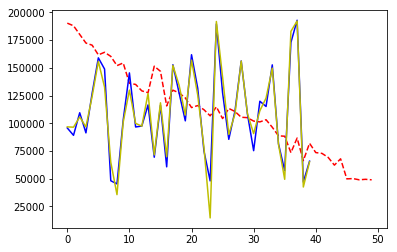

In [93]:
plt.plot(mupre_y,'r--')
plt.plot(y_pred,'b')
plt.plot(y_train,'y')

regressor_OLS.predict的預測要用x_opt，不能用X_train,但不確定regressor_OLS.predict要怎麼看準度

照理來說要可以輸入各部門的支出然後預估收入

2018.02.05